<a href="https://colab.research.google.com/github/Rodney-Jr/hello-world/blob/main/GhanaLoanConnect_Colab_Corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GhanaLoanConnect: Reducing Non-Performing Loans with Machine Learning
### Case Study – Predictive Model for Loan Default
**Objective:** Predict whether a borrower is likely to default to minimize NPLs.

In [1]:
# Step 1: Import necessary libraries
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for better visuals
from sklearn.model_selection import train_test_split #this line imports the train_test_split function from the sklearn.model_selection which is commonly used to split datasets into training an and testing sets for machine learning models
from sklearn.preprocessing import StandardScaler # imports the StandardScaler class from Sklearn.preprocessing module. StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score #imports classification_report, confusion_matrix. Area Under the Receiver Operating Characteristic Curve models from sklearn.metrics
from sklearn.linear_model import LogisticRegression #imports the LogisticRegression calss from the Sklearn.linear_model module.
from sklearn.ensemble import RandomForestClassifier #imports RandomForestClass from Sklearn.ensemblle module which is an ensemble learning methods that builds multiple decision tress and combinnes their predictions to improve accuracy and reduce overfitting.
from xgboost import XGBClassifier #imports XGBClassifier class from XGBoost(extreme Gradient Boosting) library which is used for classification tasks within this framework.

In [2]:
# Step 2: Upload your dataset (loan_borowwer_data.csv)
from google.colab import files #immports the file module from google.colab library. provides functions to interact with the Colab environment, used here to enable file uploads from local machine into colab notebook environment
uploaded = files.upload()
import io # provides tools for working with various types of i/o(input/output). used to handle the in-memory representation of the uploaded file data.
df = pd.read_csv(io.BytesIO(uploaded['loan_borowwer_data.csv'])) # reads the uploaded CSV file into pandas dataframe
df.head() # displays the first 5 rows of the DataFrame df. useful way to inspect the structure andn content of your data after loading it.

Saving loan_borowwer_data.csv to loan_borowwer_data.csv


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Step 3: Basic data inspection
df.info() # calls the .info() method on the DataFrame df.provides summary of the DataFrame, eg:number of rows and columns, data types for each column,number of non-null values in each column, and memory usage of the DataFrame
df.describe() # calls the .describe() method on the dataframe which generates descriptive statistics for the numerical columns in the dataframe.Outputs:Count,Mean,Std,Min value,25% percentile, 50% percentile(Meadian),75th percentile, Max value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


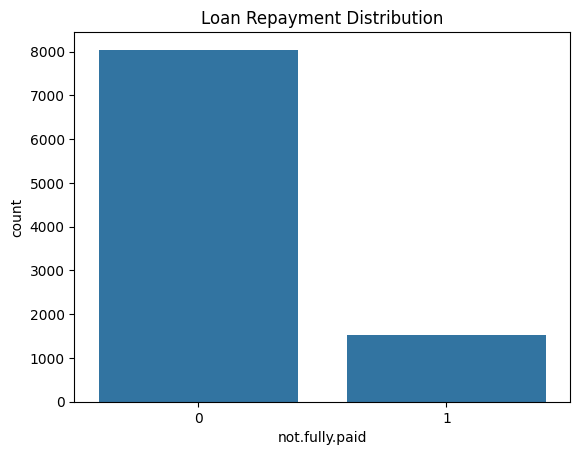

In [4]:
# Step 4: Visualize target variable
sns.countplot(x='not.fully.paid', data=df) #uses seaborn library to create a count plot which will display the number of loans that were fully paid against those not paid; providing a visual representation for your target variable
plt.title('Loan Repayment Distribution')# sets the title of the plot to "Loan Repayment Distribution". it uses the title() function from the matplotlib.pyplot module(imported as (plt)
plt.show() # used to display the plot created.

In [5]:
# Step 5: One-hot encode the 'purpose' column (categorical)
df = pd.get_dummies(df, columns=['purpose'], drop_first=True) # performs one-hot encoding on the purpose column of the dataframe df. one hot encoding converts categorical variables into a numerical format that can be used by ML models.

In [6]:
# Step 6: Feature engineering
df['income_installment_ratio'] = df['log.annual.inc'] / (df['installment'] + 1)  # Avoid division by zero by adding 1 to the denominator. which introduces a new feature ('income_installment_ratio') which will be used to assist in predicting loan default.

In [7]:
# Step 7: Prepare features and labels
X = df.drop(['not.fully.paid'], axis=1) #creates a new DataFrame X that contains all the columns from the original DataFrame df except for the "not.fully.paid' column. These remaining columns are your features that will be used to train the model.
y = df['not.fully.paid'] # creates the target variable(y) for the ML model. Selects the 'not.fully.paid' column from the DataFrame df and assigns it to the variable (y) which contains the values that your model will try to predict(whether a loan was fully paid or not).

In [8]:
# Step 8: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splits your data into training and testing sets. Specifies 20% of the data will be used for testing set, 80% used for training set.

In [9]:
# Step 9: Train Logistic Regression model
lr = LogisticRegression(max_iter=1000) #creates an instance of the LogisticRegression model with max_iter_1000 argument setting the max number of iterations for the optimazation algorithm to converge.
lr.fit(X_train, y_train) # rtains the model. the fit() method takes the training features (X_train) and the train target variable(y_train) as input and learns the relationship between them.
y_pred_lr = lr.predict(X_test) #uses the trained Logistic Regression model(lr) tomake predictions on the test set features(X_test). y_pred_lr variable predicts wehter a loan is likely to be paid or not.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Step 10: Evaluate the performance of the trained Logistic Regression
print(classification_report(y_test, y_pred_lr)) # prints classification reports. the classification_report() compares the true target values(y_test) with the model's predictions(y_pred_lr) and provides metrics like precision, recall, F1-score, and support for each class(fully paid and not fully paid)
print('ROC AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))# calculates and prints the ROCAUC score.

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.43      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.64      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916

ROC AUC: 0.6915061411810198


In [11]:
# Step 11: Train Random Forest model
rf = RandomForestClassifier()# creates an instance of the RandomForestClassifier model with default parameters.
rf.fit(X_train, y_train)#trains the Random Forest model using the training feature(x_train)and the training target variable(y_train). the model learns from the training data to make predictions.
y_pred_rf = rf.predict(X_test)# this uses the trained Random Forest model(rf) to make predictions on the test set features(X_test).

In [12]:
# Step 12: Evaluate the performance of the Random Forest model
print(classification_report(y_test, y_pred_rf))#prints a classification report comparing the true target values(y_test) with the Random Forest model's predictions(y_pred_rf). it provides precision, recall, F1-score, and support for each class.
print('ROC AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))#This line calculates and prints the ROC AUC score for the Random Forest model. It uses the predicted probabilities for the positive class from the Random Forest modelrf.predict_proba(X_test)[:,1] and the true target values(y_test)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.41      0.03      0.06       305

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.48      1916
weighted avg       0.77      0.84      0.78      1916

ROC AUC: 0.6594448006024157


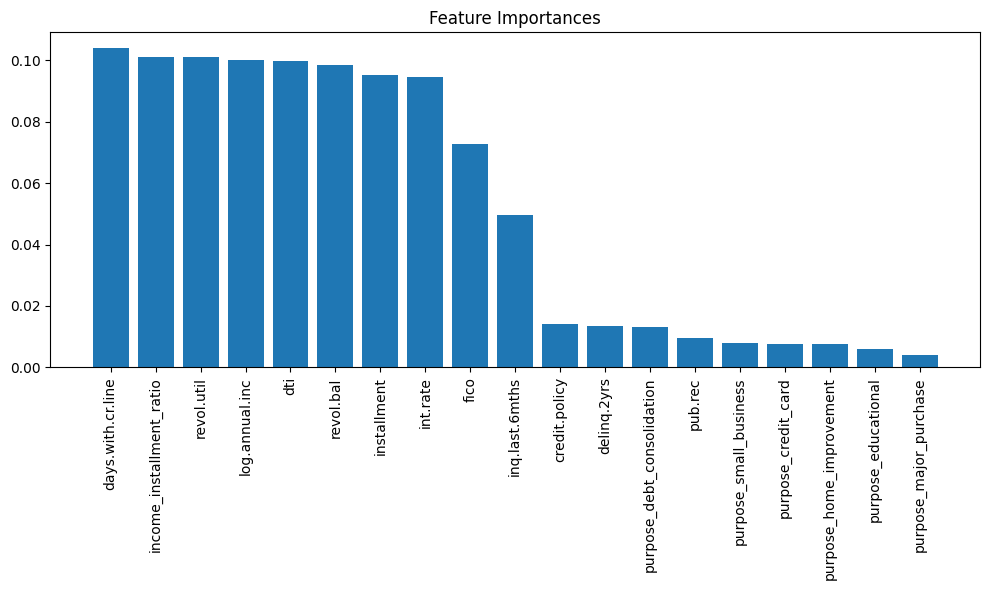

In [13]:
# Step 13: Visualize the feature importance from the trained Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Step 14: Train XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [15]:
# Step 15: Evaluate the performance of the XGBoost model
print(classification_report(y_test, y_pred_xgb))
print('ROC AUC:', roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1611
           1       0.35      0.09      0.15       305

    accuracy                           0.83      1916
   macro avg       0.60      0.53      0.52      1916
weighted avg       0.77      0.83      0.78      1916

ROC AUC: 0.6239399212382085
